# Case Study #07- Classification

# Case study on Supervised learning

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset to the python environment.

In [432]:
data = pd.read_excel('iris (1).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [433]:
# to display stats about data
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [434]:
# basic info about datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [435]:
# to display no. of samples on each class
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# 2. Do necessary pre-processing steps.

In [436]:
# check for null values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [437]:
# to check for the type of values in different attributes
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

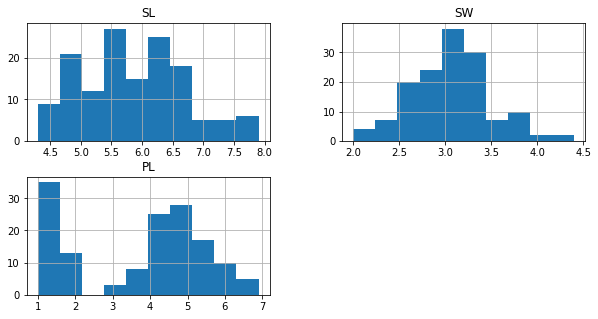

In [438]:
data1 = data[['SL','SW','PL']]
data1.hist(figsize=(10,5))
plt.show()

In [439]:
df=data
for i in ['SL','SW','PL']:
    df[i]=df[i].fillna(df[i].median())
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [440]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [441]:
# we will check for the outliers present in the dataset

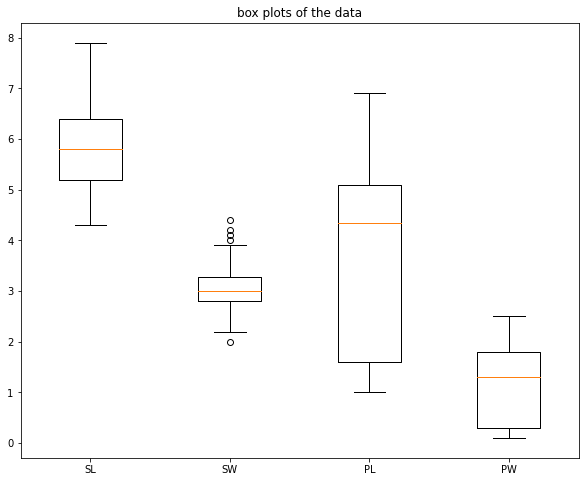

In [442]:
plt.figure(figsize=(10,8))
plt.boxplot(df[['SL', 'SW', 'PL', 'PW']],labels=['SL', 'SW', 'PL', 'PW'])
plt.title('box plots of the data')
plt.show()

In [443]:
# outlier is present only in the SW column

In [444]:
q1=np.percentile(df['SW'],25,interpolation='midpoint')
q2=np.percentile(df['SW'],50,interpolation='midpoint')
q3=np.percentile(df['SW'],75,interpolation='midpoint')

In [445]:
print(q1)
print(q2)
print(q3)

2.8
3.0
3.25


In [446]:
iqr=q3-q1
lw=q1-1.5*iqr
up=q3+1.5*iqr

In [447]:
print(lw,up)

2.1249999999999996 3.9250000000000003


In [448]:
outlier=[]
for x in df['SW']:
    if((x>up)or(x<lw)):
        outlier.append(x)

In [449]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [450]:
ind=(df['SW']>up)|(df['SW']<lw)
dt=df.loc[ind].index
df.drop(dt,inplace=True)

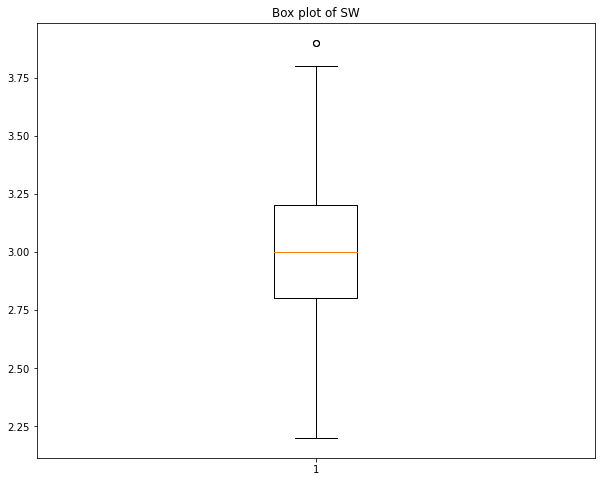

In [451]:
plt.figure(figsize=(10,8))
plt.boxplot(df['SW'])
plt.title('Box plot of SW')
plt.show()

In [452]:
# we have removed all the outliers

# Exploratory Data Analysis

<AxesSubplot:>

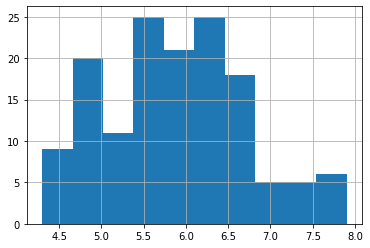

In [453]:
# histograms
df['SL'].hist()

<AxesSubplot:>

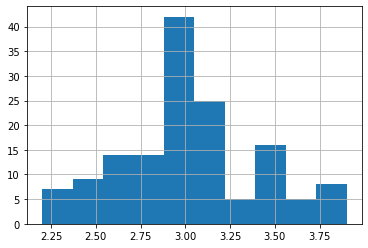

In [454]:
df['SW'].hist()

<AxesSubplot:>

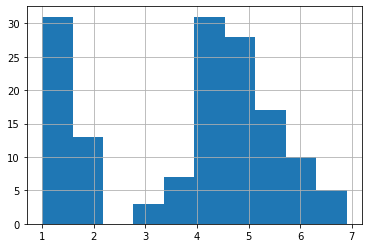

In [455]:
df['PL'].hist()

<AxesSubplot:>

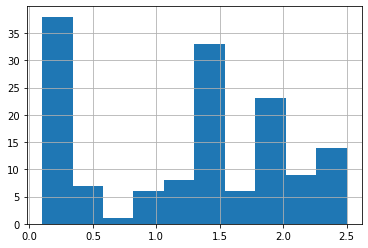

In [456]:
df['PW'].hist()

In [457]:
# scatterplot
colors = ['red', 'orange', 'blue']
Classification = ['Iris-virginica','Iris-versicolor','Iris-setosa']

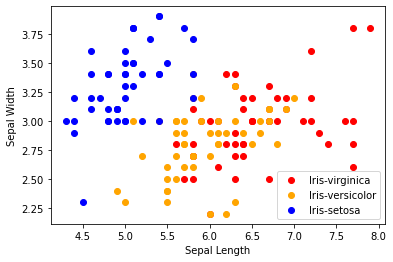

In [458]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['SL'], x['SW'], c = colors[i], label = Classification[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

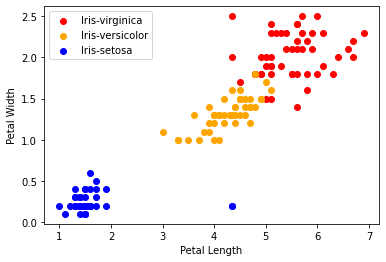

In [459]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['PL'], x['PW'], c = colors[i], label=Classification[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

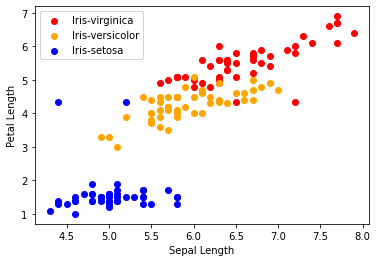

In [460]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['SL'], x['PL'], c = colors[i], label=Classification[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

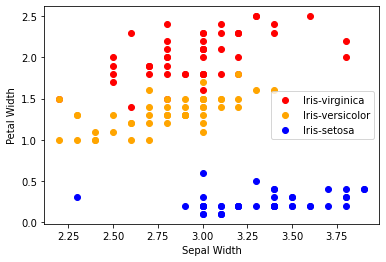

In [461]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['SW'], x['PW'], c = colors[i], label=Classification[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Coorelation Matrix

In [462]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102874,0.843357,0.809185
SW,-0.102874,1.000000,-0.362630,-0.294115
PL,0.843357,-0.362630,1.000000,0.933262
PW,0.809185,-0.294115,0.933262,1.000000


<AxesSubplot:>

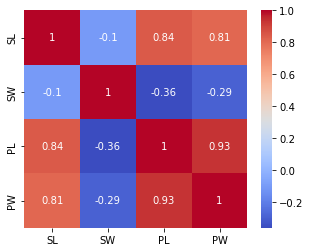

In [463]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Label Encoder

In [464]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [465]:
df['Classification'] = le.fit_transform(df['Classification'])
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [466]:
# we have converted the categorical taget column to numerical, so that our model will be more accurate

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [467]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Classification'],axis=1)
Y = df['Classification']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=2)

In [468]:
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('Y_train',y_train.shape)
print('Y_test',y_test.shape)

X_train (101, 4)
X_test (44, 4)
Y_train (101,)
Y_test (44,)


# Logistic regression

In [469]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [470]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [471]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [472]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

In [473]:
# using logistic regression we got f1 score of 95%

# KNN - k-nearest neighbours

In [474]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

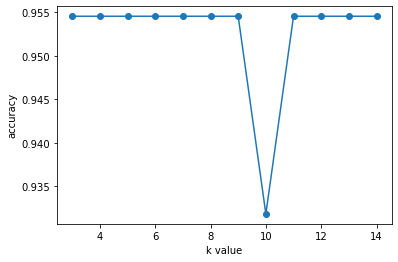

In [475]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [476]:
# we will take the k value as 5

In [477]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [478]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [479]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

In [480]:
y_test.value_counts()

2    17
0    16
1    11
Name: Classification, dtype: int64

In [481]:
#we are getting the accuracy of 95% itself

# Decision tree

In [482]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [483]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [484]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

In [485]:
# accuracy score of 95%

# SVM

In [486]:
#linear classifier

In [487]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [488]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [489]:
#polynomial SVM

In [490]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [491]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [492]:
#Radial SVM

In [493]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [494]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9318181818181818
precision score: 0.9236111111111112
recall_score: 0.93048128342246
f1 score: 0.9262187088274044


In [495]:
# here linear and polynomial SVM are getting higher f1 score compared to rbf

# RandomForest Classifier

In [496]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [497]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [498]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

In [499]:
#fine tuning of hyper parameters

In [500]:
rft=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=42,criterion='entropy')

In [501]:
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)

In [502]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [503]:
# getting the same accuracy score

In [504]:
# gradient boosting

In [505]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [506]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


# Standardizing the features

In [507]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [508]:
#logistic Regression after standardization

In [509]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [510]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9772727272727273
precision score: 0.9814814814814815
recall_score: 0.9696969696969697
f1 score: 0.9746031746031746


In [511]:
# when we standardize the feature we are getting more accurate score of 97%

In [512]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [513]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9318181818181818
precision score: 0.9296296296296296
recall_score: 0.9197860962566846
f1 score: 0.9238095238095237


# we are getting highest accuracy score of 97% on the Logistic Regression model, after Standardizing it.

In [514]:
# also doing other models after standardization

In [515]:
#svc

In [516]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [517]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9772727272727273
precision score: 0.9814814814814815
recall_score: 0.9696969696969697
f1 score: 0.9746031746031746


In [518]:
# Decision tree

In [519]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [520]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9318181818181818
precision score: 0.9296296296296296
recall_score: 0.9197860962566846
f1 score: 0.9238095238095237


In [521]:
# KNN - k-nearest neighbours

In [522]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [523]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9772727272727273
precision score: 0.9814814814814815
recall_score: 0.9696969696969697
f1 score: 0.9746031746031746
